In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [23]:
df = pd.read_csv('bank-full.csv', sep=';')

In [24]:
df.head().T

,0,1,2,3,4
age,58,44,33,47,33
job,management,technician,entrepreneur,blue-collar,unknown
marital,married,single,married,married,single
education,tertiary,secondary,secondary,unknown,unknown
default,no,no,no,no,no
balance,2143,29,2,1506,1
housing,yes,yes,yes,yes,no
loan,no,no,yes,no,no
contact,unknown,unknown,unknown,unknown,unknown
day,5,5,5,5,5


In [25]:
print(f"Размер датасета: {df.shape}")

df

Размер датасета: (45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [26]:
#Выбираем нужные столбцы
selected_columns = ['age', 'job', 'marital', 'education', 'balance', 'housing',
                   'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
                   'previous', 'poutcome', 'y']
df = df[selected_columns]


In [27]:
print(f"Размер датасета: {df.shape}")

df

Размер датасета: (45211, 15)


,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,1729,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,5715,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,668,no,telephone,17,nov,508,4,-1,0,unknown,no


In [28]:
# Проверка пропущенных значений
print("Пропущенные значения:")
print(df.isnull().sum())

Пропущенные значения:
age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [29]:
# Вопрос 1: Самое частое значение для education
education_mode = df['education'].mode()[0]
print(f"Самое частое значение в education: {education_mode}")

Самое частое значение в education: secondary


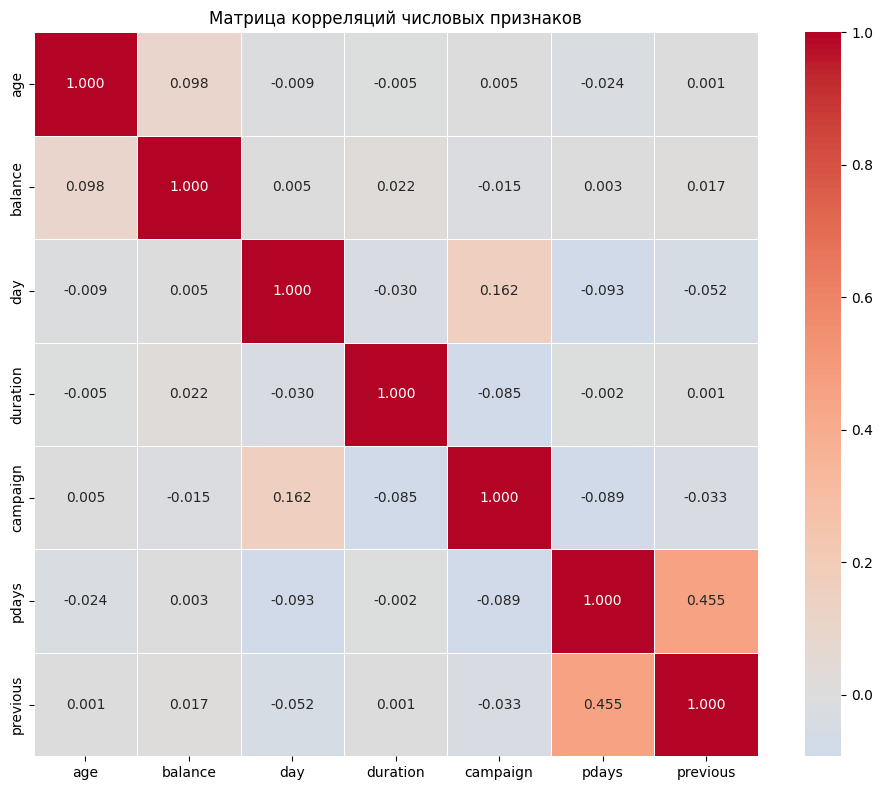

Пара с наибольшей корреляцией: ('pdays', 'previous') (0.455)


In [30]:
# Вопрос 2: Корреляционная матрица
numeric_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.3f', linewidths=0.5)
plt.title('Матрица корреляций числовых признаков')
plt.tight_layout()
plt.show()
# Находим пару с наибольшей корреляцией
max_corr = 0
max_pair = ()
for i in range(len(numeric_columns)):
    for j in range(i+1, len(numeric_columns)):
        corr = abs(correlation_matrix.iloc[i, j])
        if corr > max_corr:
            max_corr = corr
            max_pair = (numeric_columns[i], numeric_columns[j])

print(f"Пара с наибольшей корреляцией: {max_pair} ({max_corr:.3f})")

In [31]:
# Кодирование целевой переменной
df['y'] = df['y'].map({'yes': 1, 'no': 0})

In [32]:
# Разделение данных
X = df.drop('y', axis=1)
y = df['y']

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

print(f"\nРазмеры наборов данных:")
print(f"Тренировочный: {X_train.shape}")
print(f"Валидационный: {X_val.shape}")
print(f"Тестовый: {X_test.shape}")


Размеры наборов данных:
Тренировочный: (27126, 14)
Валидационный: (9042, 14)
Тестовый: (9043, 14)


In [35]:
# Вопрос 3: Взаимная информация
categorical_columns = ['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']

# Кодирование для расчета mutual information
X_train_encoded = pd.get_dummies(X_train[categorical_columns], drop_first=True)
# Расчет mutual information
mi_scores = mutual_info_classif(X_train_encoded, y_train, random_state=42)
mi_df = pd.DataFrame({'feature': X_train_encoded.columns, 'mi_score': mi_scores})
mi_df['mi_score'] = mi_df['mi_score'].round(2)

In [36]:
# Группируем по исходным категориальным признакам
original_feature_mi = {}
for feature in categorical_columns:
    feature_cols = [col for col in X_train_encoded.columns if col.startswith(feature + '_')]
    if feature_cols:
        max_mi_for_feature = mi_df[mi_df['feature'].isin(feature_cols)]['mi_score'].max()
        original_feature_mi[feature] = max_mi_for_feature
        print(f"{feature}: {max_mi_for_feature:.2f}")
print(f"Признак с наибольшей взаимной информацией: {max_mi_feature} ({original_feature_mi[max_mi_feature]})")

job: 0.00
marital: 0.01
education: 0.01
housing: 0.01
contact: 0.01
month: 0.01
poutcome: 0.03
Признак с наибольшей взаимной информацией: poutcome (0.03)


In [64]:
# Вопрос 4: Логистическая регрессия
# One-hot кодирование всех данных
categorical_columns_full = ['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']
numeric_columns_full = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

X_train_processed = X_train[numeric_columns_full].copy()
X_val_processed = X_val[numeric_columns_full].copy()

for col in categorical_columns_full:
    dummies_train = pd.get_dummies(X_train[col], prefix=col, drop_first=True)
    dummies_val = pd.get_dummies(X_val[col], prefix=col, drop_first=True)

In [65]:
# Выравнивание столбцов
for dummy_col in dummies_train.columns:
    X_train_processed[dummy_col] = dummies_train[dummy_col]
    X_val_processed[dummy_col] = dummies_val.get(dummy_col, 0)
print(f"После one-hot кодирования:")
print(f"Тренировочный набор: {X_train_processed.shape}")
print(f"Валидационный набор: {X_val_processed.shape}")
# Обучение модели
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train_processed, y_train)

y_val_pred = model.predict(X_val_processed)
accuracy_q4 = accuracy_score(y_val, y_val_pred)
print(f"Точность на валидационном наборе: {accuracy_q4:.2f}")

После one-hot кодирования:
Тренировочный набор: (27126, 10)
Валидационный набор: (9042, 10)
Точность на валидационном наборе: 0.90


In [77]:
# Вопрос 5: Feature elimination
base_accuracy = accuracy_q4
features_to_test = ['age', 'balance', 'marital', 'previous']
results = []

print("\nРезультаты исключения признаков:")
for feature in features_to_test:
    # Удаляем столбцы
    X_train_reduced = X_train_processed.drop(cols_to_drop, axis=1)
    X_val_reduced = X_val_processed.drop(cols_to_drop, axis=1)

    # One-hot кодирование
    cols_to_drop = [col for col in X_train_processed.columns if col.startswith(feature)]
    X_train_temp = X_train_processed.drop(columns=cols_to_drop)
    X_val_temp = X_val_processed.drop(columns=cols_to_drop)

    # Обучаем модель без признака
    model_reduced = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model_reduced.fit(X_train_reduced, y_train)

    # Предсказания и точность
    y_val_pred_reduced = model_reduced.predict(X_val_reduced)
    reduced_accuracy = accuracy_score(y_val, y_val_pred_reduced)

    # Разница в точности
    accuracy_difference = base_accuracy - reduced_accuracy
    results.append({
        'feature': feature,
        'accuracy_without': reduced_accuracy,
        'difference': accuracy_difference
    })
    print(f"Без '{feature}': {reduced_accuracy:.4f} (разница: {accuracy_difference:+.4f})")

# Находим признак с наименьшей разницей
min_diff_feature = min(results, key=lambda x: abs(x['difference']))
print(f"\nПризнак с наименьшей разницей: {min_diff_feature['feature']}")
print(f"Разница: {min_diff_feature['difference']:.4f}")


Результаты исключения признаков:
Без 'age': 0.9000 (разница: -0.0001)
Без 'balance': 0.9000 (разница: -0.0001)
Без 'marital': 0.8994 (разница: +0.0006)
Без 'previous': 0.8999 (разница: +0.0000)

Признак с наименьшей разницей: previous
Разница: 0.0000


In [84]:
# Вопрос 6: Регуляризация
C_values = [0.01, 0.1, 1, 10]
best_accuracy = 0
best_C = None

for C in C_values:
    model_reg = LogisticRegression(solver='liblinear', C=C, max_iter=1000, random_state=42)
    model_reg.fit(X_train_processed, y_train)

    y_val_pred_reg = model_reg.predict(X_val_processed)
    accuracy_reg = accuracy_score(y_val, y_val_pred_reg)

    print(f"C = {C}: точность = {accuracy_reg:.3f}")

    if accuracy_reg > best_accuracy:
        best_accuracy = accuracy_reg
        best_C = C

print(f"Лучшее значение C: {best_C}")

C = 0.01: точность = 0.896
C = 0.1: точность = 0.900
C = 1: точность = 0.900
C = 10: точность = 0.900
Лучшее значение C: 0.1


In [85]:
ОТВЕТЫ:

1. secondary
2. pdays и previous
3. poutcome
4. 0.9
5. previous
6. 0.1